In [1]:
from os.path import join as oj
import sys
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import data
from style import *
from data import feats_numerical, feats_categorical, meta
# plt.style.use('dark_background')
# sns.set(style="white")
%matplotlib inline
%load_ext autoreload
%autoreload 2

**load the data**

In [2]:
df_pecarn, df_psrc, common_feats, filtered_feats_pecarn, filtered_feats_psrc = data.load_it_all(dummy=False, impute=True)
feats_binary = [feat for feat in common_feats
                if not feat in feats_numerical + feats_categorical + meta]
# df_pecarn = df_pecarn[df_pecarn.cv_fold.isin(data.pecarn_train_idxs)]
# df_psrc = df_psrc[df_psrc.cv_fold.isin(data.psrc_train_idxs)]

/accounts/projects/vision/.local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# see what feats matched / are missing

In [3]:
# matched feats
for feat in common_feats:
    print(feat, '\t', df_pecarn[feat].min(), '\t', df_pecarn[feat].max())
print(list(filtered_feats_pecarn.intersection(filtered_feats_psrc)))

SeatBeltSign 	 no 	 yes
VomitWretch 	 no 	 yes
ThoracicTrauma 	 no 	 yes
MOI 	 Bike collision/fall 	 unknown
RtCostalTender 	 1.0 	 4.0
Race 	 American Indian or Alaska Native 	 unknown
InitSysBPRange 	 36.0 	 202.0
DecrBreathSound 	 no 	 yes
InitHeartRate 	 0.0 	 268.0
AbdomenPain 	 no 	 yes
AbdDistention 	 no 	 yes
CostalTender 	 no 	 yes
Race_orig 	 American Indian or Alaska Native 	 unknown
AbdTrauma_or_SeatBeltSign 	 no 	 yes
Hypotension 	 no 	 yes
Age 	 0 	 17
GCSScore_Full 	 no 	 yes
AbdTrauma 	 no 	 yes
DistractingPain 	 no 	 yes
LtCostalTender 	 1.0 	 4.0
AbdTenderDegree 	 Mild 	 Severe
GCSScore 	 3.0 	 15.0
iai_intervention 	 0 	 1
cv_fold 	 1 	 6
dset 	 pecarn 	 pecarn
['SeatBeltSign', 'VomitWretch', 'ThoracicTrauma', 'MOI', 'RtCostalTender', 'Race', 'InitSysBPRange', 'DecrBreathSound', 'InitHeartRate', 'AbdomenPain', 'AbdDistention', 'CostalTender', 'Race_orig', 'AbdTrauma_or_SeatBeltSign', 'Hypotension', 'Age', 'GCSScore_Full', 'AbdTrauma', 'DistractingPain', 'LtCostalTend

In [4]:
print('psrc but not pecarn')
filtered_feats_psrc.difference(filtered_feats_pecarn)

psrc but not pecarn


{'FemurFracture'}

In [5]:
print('pecarn but not psrc')
print(filtered_feats_pecarn.difference(filtered_feats_psrc))

pecarn but not psrc
{'ThoracicTender', 'Sex'}


# look for feat shift

**continuous features**

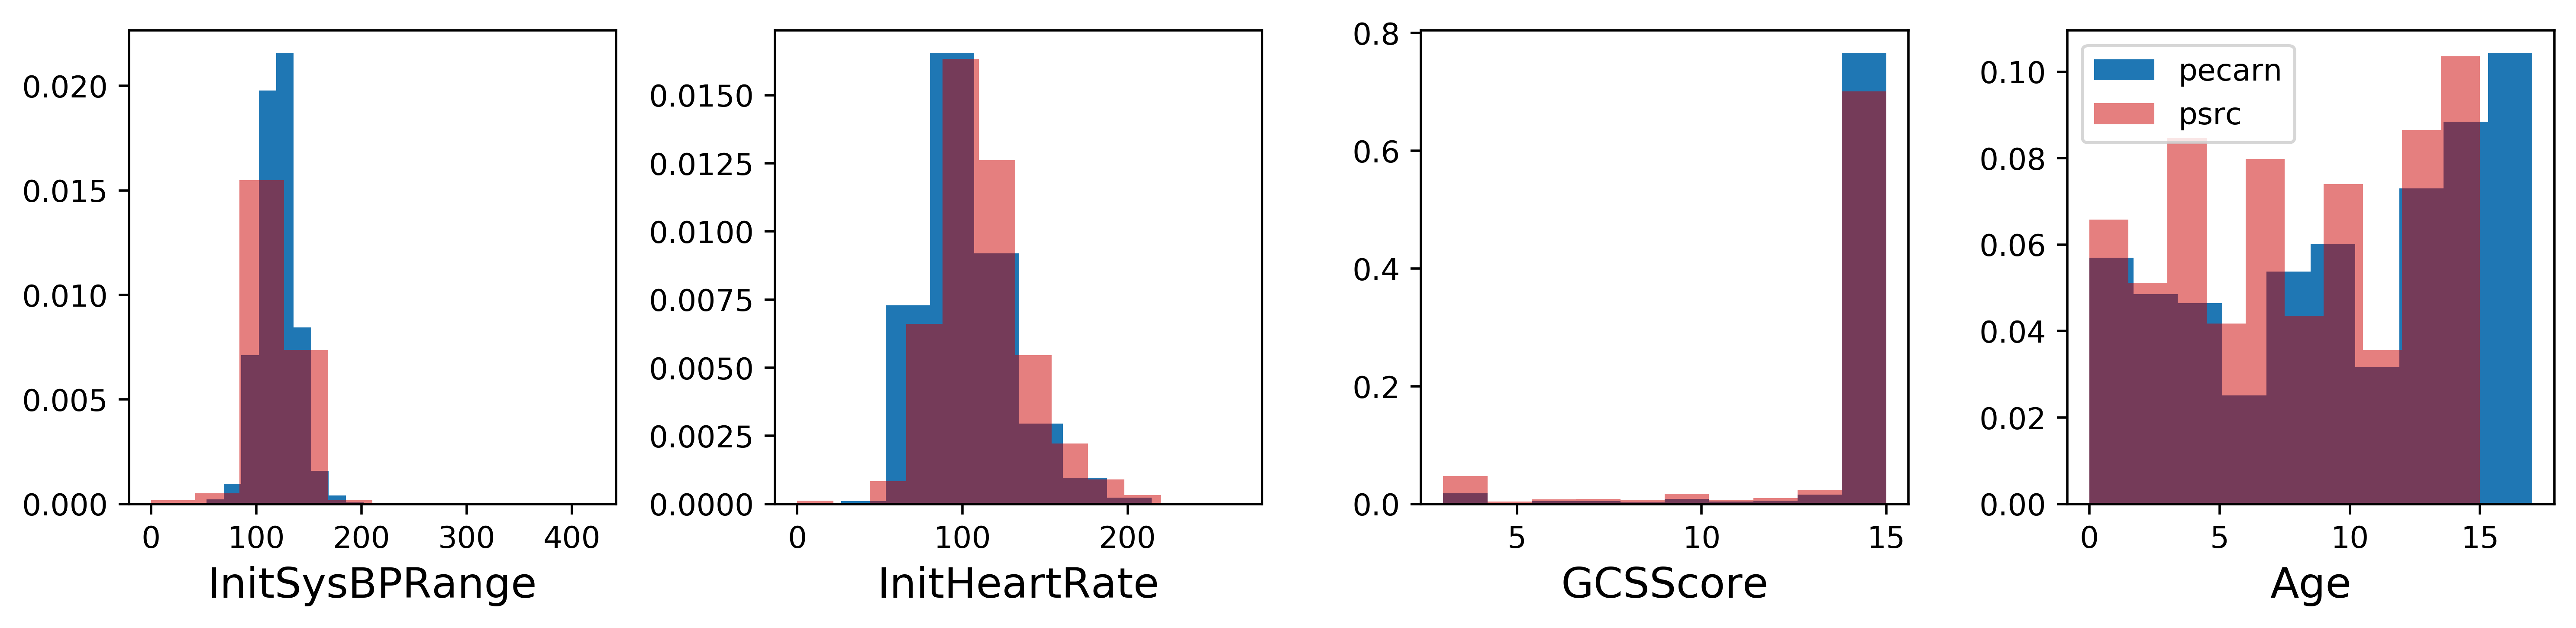

In [26]:
R, C, = 1, 4
plt.figure(figsize=(12, 3), dpi=500)
for i in range(len(feats_numerical)):
    plt.subplot(R, C, i + 1)
    feat = feats_numerical[i]
    plt.hist(df_pecarn[feat], density=True, alpha=1, label='pecarn', color=cb)
    plt.hist(df_psrc[feat], density=True, alpha=0.5, label='psrc', color=cr)
    plt.xlabel(feat, fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**categorical features**

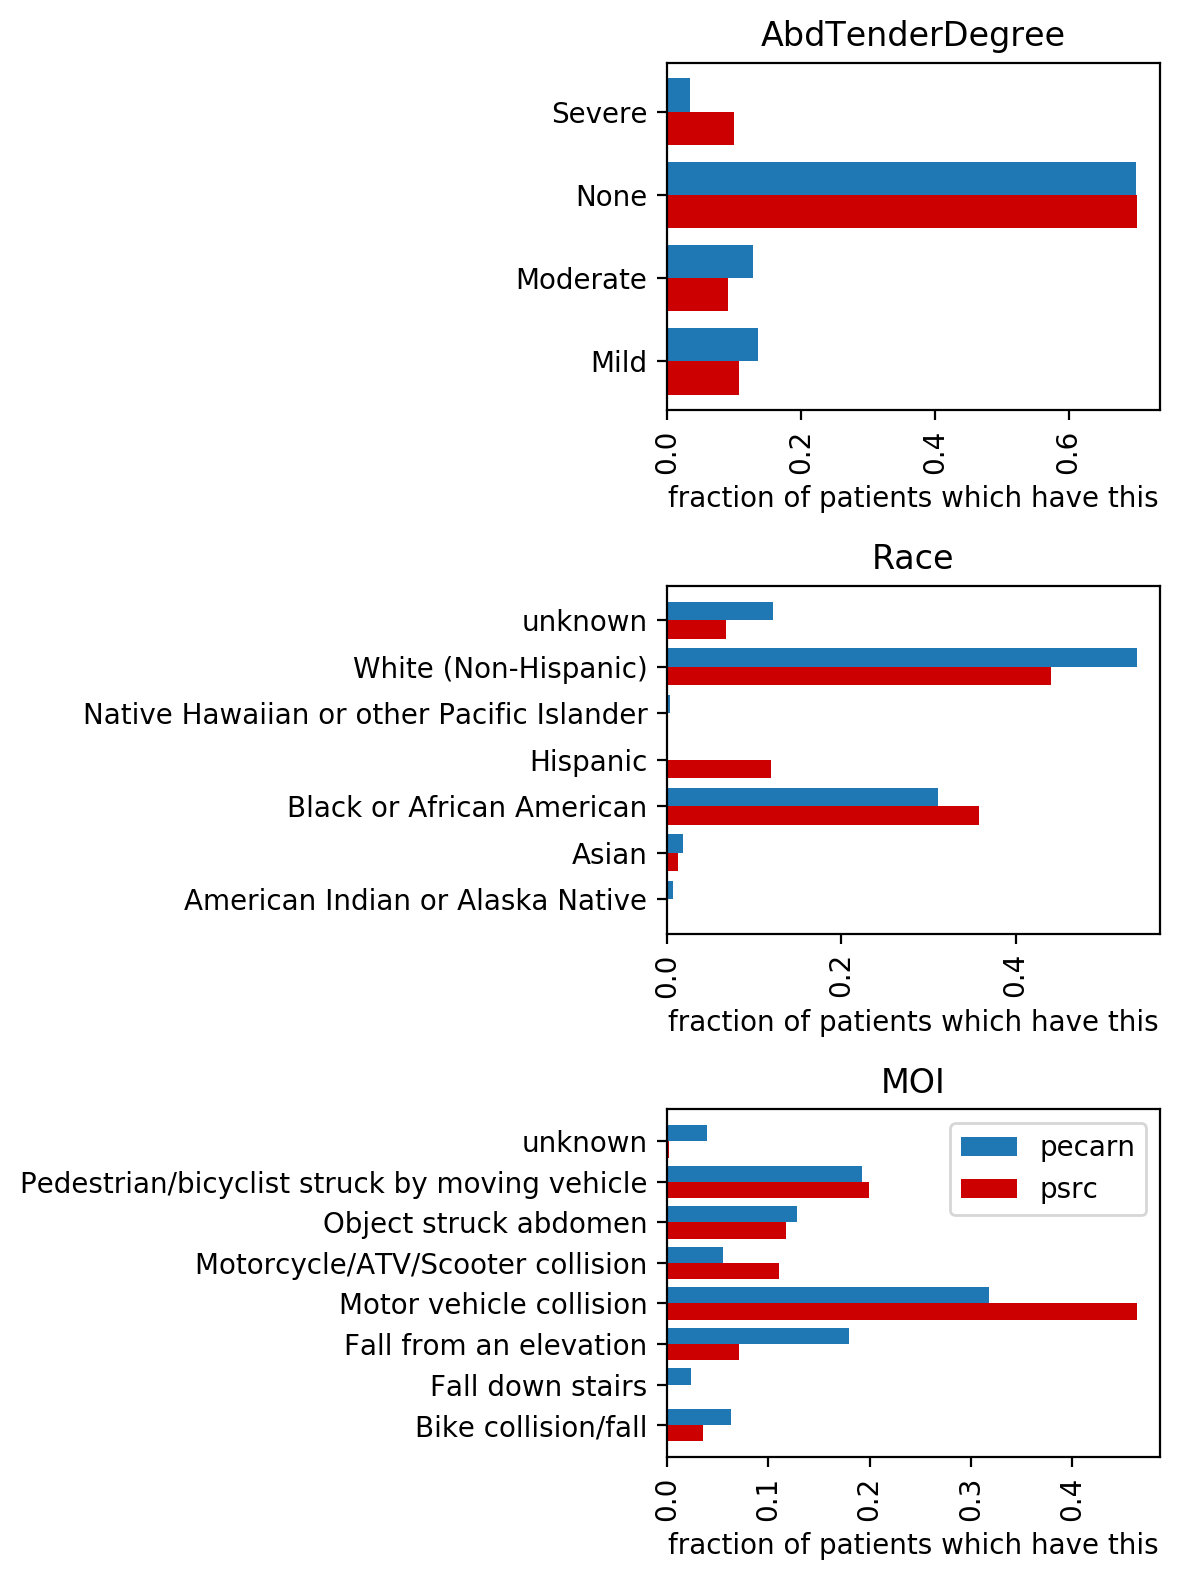

In [6]:
R, C = len(feats_categorical), 1
plt.figure(figsize=(6, 8), dpi=200)
# print(feats_categorical)
for i in range(R):
    plt.subplot(R, C, i + 1)
    feat = feats_categorical[i]
    vals_unique = np.unique(np.hstack((df_pecarn[feat], df_psrc[feat]))).tolist()
    n = len(vals_unique)
    frac_pecarn = np.array([(df_pecarn[feat]==val).sum() for val in vals_unique]) / df_pecarn.shape[0]
    frac_psrc = np.array([(df_psrc[feat]==val).sum() for val in vals_unique]) / df_psrc.shape[0]
    
    width = 0.4
    plt.barh(np.arange(n), frac_pecarn, height=0.4, label='pecarn', color=cb)
    plt.barh(np.arange(n) - width, frac_psrc, height=0.4, label='psrc', color=cr)
    plt.yticks(np.arange(n) - width + 0.2, vals_unique)
    plt.xlabel('fraction of patients which have this')

    plt.xticks(rotation='vertical')
    plt.title(feat)

plt.legend()
plt.tight_layout()
plt.show()

**binary feats**

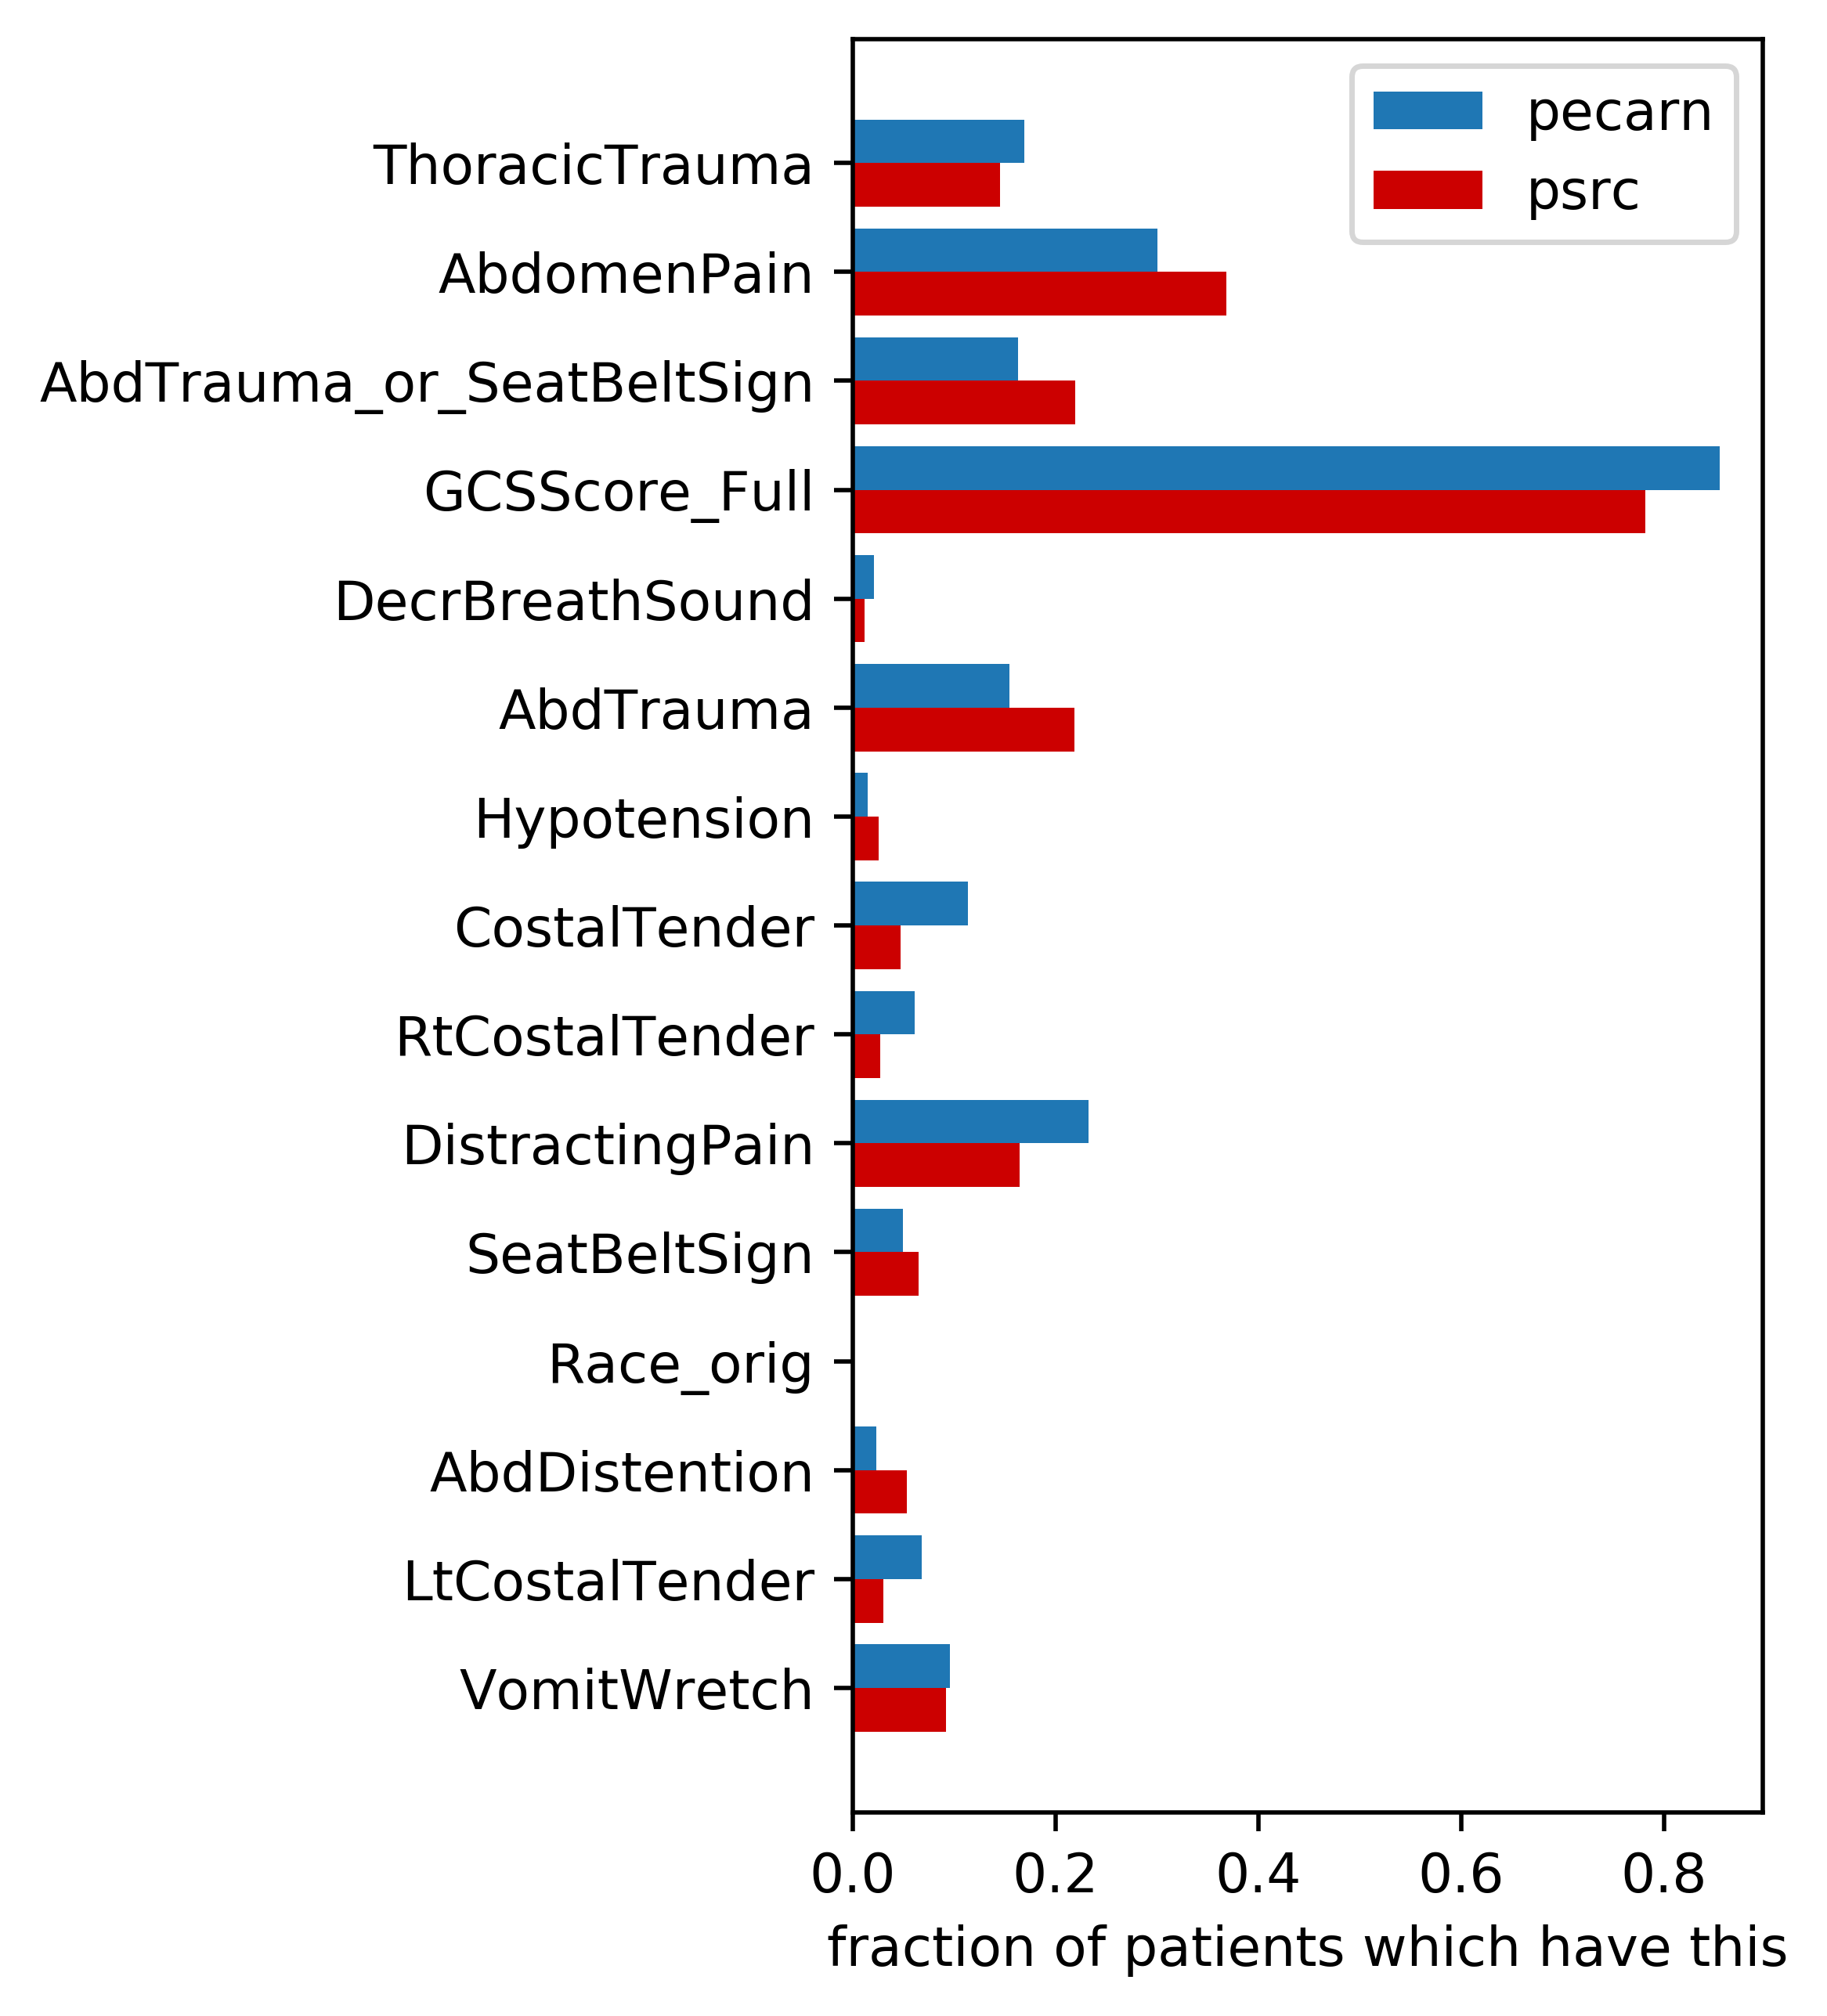

In [28]:
R, C = 3, 4
n = len(feats_binary)
def true_or_yes(vals):
    return (vals==True) | (vals=='yes')
frac_psrc = true_or_yes(df_psrc[feats_binary]).mean().values
frac_pecarn = true_or_yes(df_pecarn[feats_binary]).mean().values

width = 0.4
plt.figure(dpi=500, figsize=(3, 6))
plt.barh(np.arange(n), frac_pecarn, height=0.4, label='pecarn', color=cb)
plt.barh(np.arange(n) - width, frac_psrc, height=0.4, label='psrc', color=cr)
plt.yticks(np.arange(n) - width + 0.2, feats_binary)
plt.xlabel('fraction of patients which have this')
plt.legend()
plt.show()

**missing features**

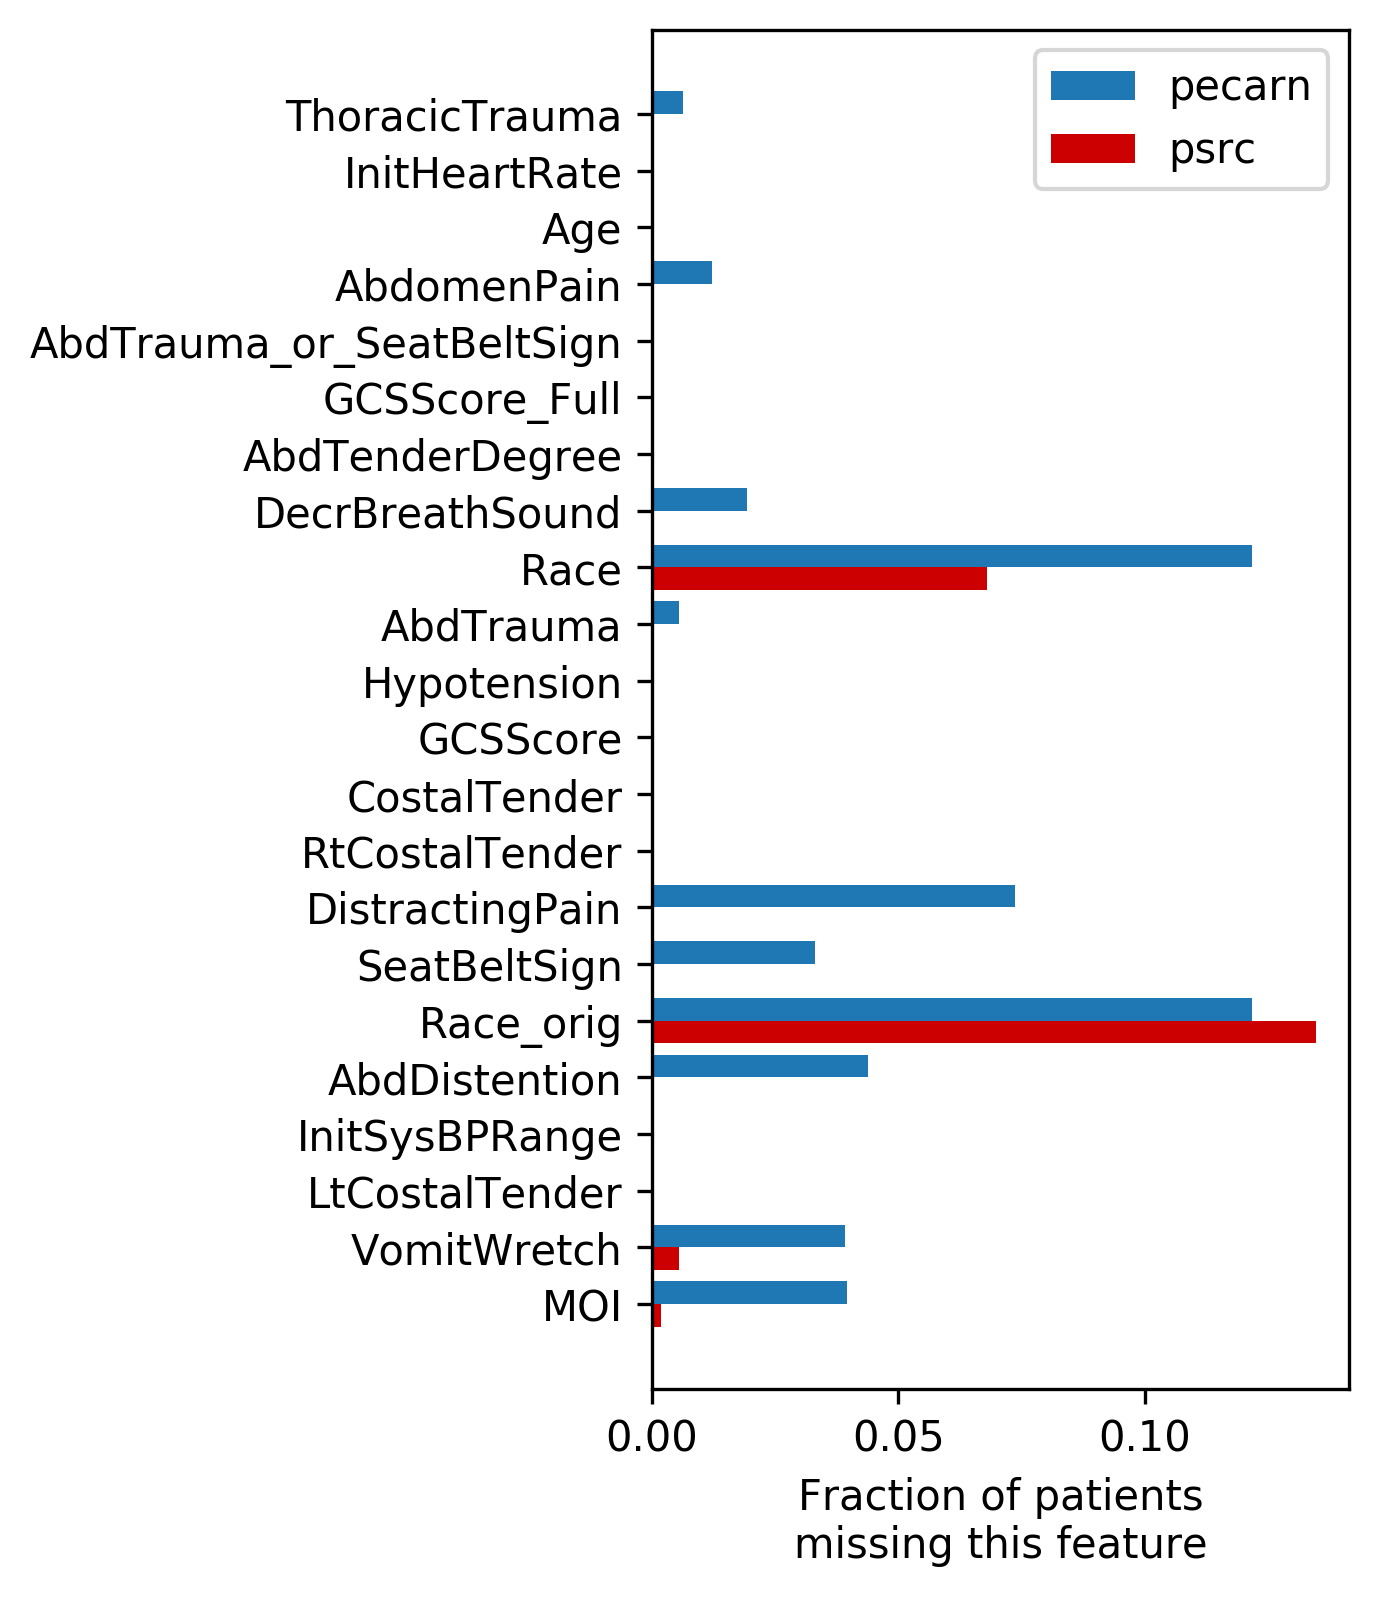

In [29]:
R, C = 3, 4
feats_all = [feat for feat in common_feats
         if not feat in meta]
n = len(feats_all)
frac_psrc = (df_psrc[feats_all]=='unknown').mean().values
frac_pecarn = (df_pecarn[feats_all]=='unknown').mean().values

width = 0.4
plt.figure(dpi=300, figsize=(3, 6))
plt.xlabel('Fraction of patients\nmissing this feature')
plt.barh(np.arange(n), frac_pecarn, height=0.4, label='pecarn', color=cb)
plt.barh(np.arange(n) - width, frac_psrc, height=0.4, label='psrc', color=cr)
plt.yticks(np.arange(n) - width + 0.2, feats_all)

plt.legend()
plt.show()

**write csvs**

In [30]:
df_pecarn.astype('object').describe().transpose().to_csv('processed/pecarn_vars.csv')
df_psrc.astype('object').describe().transpose().to_csv('processed/psrc_vars.csv')

# how are vars related to outcome

In [3]:
def get_risks(df, feat, vals_unique, outcome='iai_intervention'):
    '''Return iai with intervention as a percentage
    '''
    risks = []
    for val in vals_unique:
        risks.append(df[df[feat]==val][outcome].mean())
    return np.array(risks) * 100

In [ ]:
# feats = feats_categorical
feats = ['Sex', 'Age_discrete']


def agecut(age): # inclusive on right end
    return pd.cut(age, bins=(-1, 4, 9, 1000), labels=['<5', '5-9', '>9'])
df_psrc['Age_discrete'] = agecut(df_psrc['Age'])
df_pecarn['Age_discrete'] = agecut(df_pecarn['Age'])

R, C = len(feats), 1
plt.figure(figsize=(6, 8), dpi=200)
WIDTH = 0.4
for i in range(R):
    plt.subplot(R, C, i + 1)
    feat = feats[i]
    if feat in df_psrc.keys(): # need to check bc Sex is not there
        vals_unique = list(set(df_pecarn[feat].unique().tolist() + df_psrc[feat].unique().tolist()))
        n = len(vals_unique)
        risks = get_risks(df_psrc, feat, vals_unique)
        plt.barh(np.arange(n) - WIDTH, risks, height=0.4, label='psrc', color=cg) #, color=cr)
    else:
        vals_unique = np.unique(df_pecarn[feat]).tolist()
        n = len(vals_unique)
    
    risks = get_risks(df_pecarn, feat, vals_unique)
    plt.barh(np.arange(n), risks, height=0.4, label='pecarn', color=cp) #, color=cb)
    plt.yticks(np.arange(n) - WIDTH + 0.2, vals_unique)
    plt.xlabel('Risk for IAIw/I (%)')

    plt.xticks(rotation='vertical')
    plt.title(feat)

plt.legend()
plt.tight_layout()
plt.show()